#                                Home Credit Default Risk - Modelling

## Completed By: Anusha, Charlie, Kritika and Sakshi


## Table Of Contents
##### 1. Introduction
##### 2. Data Preparation
    2.1 Loading Libraries
    2.2 Loading the Dataset
    2.3 Explore the Dataset
##### 3. Dataset Cleaning And Imputing
##### 4. Clean the Test Dataset
##### 5. Majority Class Of Target Variable
##### 6. Pre-Modeling/ Modeling Process
##### 7. Model Performance
     7.1 Logistic Regression Model
     7.2 Random Forest Model
     7.3. XG Boost Model
##### 8. Results
##### 9. Group Members Contribution
##### 10. Conclusion




###  Introduction

Exploring Credit Default Risk at Home Credit - Establishment and Baseline Model. Numerous individuals encounter obstacles in obtaining loans due to inadequate or non-existent credit backgrounds. Unfortunately, this demographic often falls prey to unscrupulous lenders. Home Credit endeavors to enhance financial inclusion for this underserved population by offering a trustworthy and favorable borrowing environment.

This notebook delves into the issue of credit default risk within Home Credit, a company dedicated to extending loans to individuals with limited or absent credit histories. This marginalized group frequently faces exploitation by unreliable lenders, underscoring the importance for Home Credit to ensure a positive and secure borrowing process.

To tackle this challenge, Home Credit harnesses diverse alternative data sources, such as telecommunications and transactional data, to forecast their clients' repayment capabilities.

Our analysis commences with data cleansing, encompassing preprocessing and data preparation for modeling purposes. Subsequently, we construct predictive models utilizing the refined data to evaluate credit default risk. Our focus lies on the target variable, employing various machine learning models and computing pertinent metrics like accuracy and ROC values.

The aim is to pinpoint the most effective model based on Kaggle scores. We commence with Logistic Regression and additionally explore Random Forest and XGBoost to gauge their efficacy in forecasting credit default risk.

### Data Preparation

#### Loading Libraries

In [1]:
# Import numpy as np for support with pandas
# pandas as pd for handling dataframes
# matplotlib and seaborn for creating visualizations.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Dataset

In [3]:
# Loading the application_train.csv to data_train.
data_train=pd.read_csv("application_train.csv")

####  Explore Dataset

In [4]:
# show first 5 rows of the dataset.
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Show last 5 rows of the dataset.
data_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


From the head() and tail() functions from the dataset we can see that there are 122 columns with 307511 rows. And some of the important columns are SK_ID_CURR which is loan application id and TARGET which is the target (default) variable.



In [6]:
data_train.duplicated().sum()

0

All rows are unique as there are no duplicated row available. 

In [7]:
# Show rows and columns of the dataset and their dtypes.
data_train.shape
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


From the dataset has 307511 rows and 122 columns. 
</br>In the dataset 
</br>65 columns =  float type 
</br>41 columns = int64 type 
</br>16 columns = object type

In [8]:
data_train.columns #columns in the train dataset

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

Here, we see the names of the 122 columns in the dataset. For example, CODE_GENDER provides the gender of the applicant, CNT_CHILDREN indicates the number of children the applicant has, and AMT_INCOME_TOTAL reveals the applicant's income.

The columns FLAG_DOCUMENT_2 through FLAG_DOCUMENT_21 consist of binary flags that show whether specific documents are present or absent in the applicant's file. Each flag corresponds to a different document type, such as identification or income documents.

The features AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, and AMT_REQ_CREDIT_BUREAU_YEAR track the number of times the applicant's information was requested from the Credit Bureau within specified time frames, ranging from an hour to a year. Each feature denotes a different time interval.

In [9]:
# Show data type of every column in the dataset.
data_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

As mentioned above the dataset has int64, float64 along with object type columns.

### Dataset Cleaning And Imputing

Let take a look at the dataset and summarize the numeric and object columns.

In [10]:
# Summary of the all numeric columns
numeric_cols = data_train.select_dtypes(exclude=['object']).columns
numeric_summary = data_train[numeric_cols].describe()
numeric_summary

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


We notice outliers in numeric columns. For instance, the maximum number of children is 19, and the highest reported AMT_INCOME_TOTAL is 117,000,000, both substantial but plausible values for their respective columns. However, the maximum value for DAYS_EMPLOYED is 365,243 days, equivalent to approximately 1,000 years, which is clearly unrealistic. We will further investigate these outliers in later stages.

Let's Summarize object type columns

In [12]:
# Unique values in categorical values.
categorical_cols = data_train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_values = data_train[col].unique()
    print(f"\nUnique values in {col}:")
    print(unique_values)


Unique values in NAME_CONTRACT_TYPE:
['Cash loans' 'Revolving loans']

Unique values in CODE_GENDER:
['M' 'F' 'XNA']

Unique values in FLAG_OWN_CAR:
['N' 'Y']

Unique values in FLAG_OWN_REALTY:
['Y' 'N']

Unique values in NAME_TYPE_SUITE:
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Unique values in NAME_INCOME_TYPE:
['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Unique values in NAME_EDUCATION_TYPE:
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Unique values in NAME_FAMILY_STATUS:
['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Unique values in NAME_HOUSING_TYPE:
['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

Unique values in OCCUPATION_TYPE:
['Laborers' 'Core staff' 'Accountants' 'Managers

We observe the presence of NaN (null) values in certain columns. Additionally, values such as "unknown," "not specified," and "XNA," among others, are not considered null. Instead, they are unique values specific to their respective columns, indicating information that is either unknown, not specified, or not applicable to the applicants at the time of recording.

In [13]:
# Calculating percentage of missing values.
missing_data=(data_train.isna().sum()/len(data_train))
missing_data.sort_values(ascending=False)

COMMONAREA_MEDI             0.698723
COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
                              ...   
NAME_HOUSING_TYPE           0.000000
NAME_FAMILY_STATUS          0.000000
NAME_EDUCATION_TYPE         0.000000
NAME_INCOME_TYPE            0.000000
SK_ID_CURR                  0.000000
Length: 122, dtype: float64

An insightful observation reveals that certain columns contain approximately 69% null values, rendering them devoid of meaningful information for the model. Setting a cutoff threshold at 45%, it's determined that when more than 45% of values are null in a column, it lacks the variation necessary to contribute effectively to the model.

In [16]:
# Numeric Columns which have more than 45% of missing values.
app_train_numeric= data_train.select_dtypes(include=['number'])
missings=app_train_numeric.loc[:,app_train_numeric.isna().mean() >= 0.45]
highly_missing_features_numeric = missings.columns
missings.columns

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'TO

We will delete the columns whose null values make up to 45% of the data.

In [17]:
# Dropping columns
data_train=data_train.drop(highly_missing_features_numeric,axis=1)
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


After the drop, we observe that we are left with a total of 77 columns.

Now, We will remove columns that are of the object data type.

In [19]:
# Object columns which have more than 45% of missing values.
app_train_object= data_train.select_dtypes(include=['object'])
missings=app_train_object.loc[:,app_train_object.isna().mean() >= 0.45]
highly_missing_features_object = missings.columns
missings.columns

Index(['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [20]:
# Dropping the object columns.
data_train=data_train.drop(highly_missing_features_object,axis="columns")
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


After removing the numeric and object type columns, we are left with 73 columns in the dataset.

Next, we need to address the NaN (null) values by either imputing or removing them. But first, let's check if there are any outliers in the data.

In [22]:
# Using IQR to find outliers.
outliers={}
for i in data_train.columns:
  if data_train[i].dtype != 'object':
    Q1 = data_train[i].quantile(0.25)
    Q3 = data_train[i].quantile(0.75)
    IQR = Q3 - Q1
    # identify outliers
    threshold = 1.5
    outliers[i] = data_train[(data_train[i] < Q1 - threshold * IQR) | (data_train[i] > Q3 + threshold * IQR)]
outliers;


Given the presence of outliers in numerous columns, it's necessary to handle them. We'll opt to impute the numeric columns with the median instead of the mean, as the mean is more susceptible to being skewed by outliers.

For columns of the object data type, NaN values typically represent null or missing data, given the presence of categories like XNA, others, unknown, and not specified. Therefore, we should impute NaN values in object type columns with the mode.

In [23]:
# Imputating mode for object columns and median for numeric columns.
for column in data_train.columns:
    if data_train[column].dtype == 'object':
        data_train[column] = data_train[column].fillna(data_train[column].mode().iloc[0])
    else:
        data_train[column] = data_train[column].fillna(data_train[column].median())

Imputing the mode for object columns and the median for numeric columns are standard practices in data preprocessing due to their respective suitability for categorical and numerical data. Object columns, which typically represent categorical data, are best imputed with the mode, the most frequent category, as it preserves the distribution and avoids introducing bias. Numeric columns, often subject to skewness and outliers, benefit from using the median for imputation because it maintains the data's central tendency without being influenced by extreme values, ensuring the dataset's characteristics remain intact.

In [24]:
missing_data=data_train.isna().sum()
missing_data.sort_values(ascending=False)

SK_ID_CURR                    0
REG_CITY_NOT_WORK_CITY        0
FLAG_DOCUMENT_8               0
FLAG_DOCUMENT_7               0
FLAG_DOCUMENT_6               0
                             ..
FLAG_CONT_MOBILE              0
FLAG_WORK_PHONE               0
FLAG_EMP_PHONE                0
FLAG_MOBIL                    0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

Currently, there are no null values present in the dataset.

We know that DAYS_EMPLOYED has some outliers as mentioned above. So, let's remove some of the outliers from that column using the IQR (Inter Quartile Range)

In [25]:
def remove_outlier(col):
  Q1,Q3=col.quantile([.25,.75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5*IQR)
  upper_range=Q3+(1.5*IQR)
  return lower_range,upper_range

In [27]:
for i in data_train.columns:
 if data_train[i].dtype != 'object':
    lowlevel,uplevel=remove_outlier(data_train['DAYS_EMPLOYED'])
data_train['DAYS_EMPLOYED']=np.where(data_train['DAYS_EMPLOYED']>uplevel,uplevel,data_train['DAYS_EMPLOYED'])
data_train['DAYS_EMPLOYED']=np.where(data_train['DAYS_EMPLOYED']<lowlevel,lowlevel,data_train['DAYS_EMPLOYED'])


In [28]:
data_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      -1203.542428
std        2732.404969
min       -6466.500000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max        3417.500000
Name: DAYS_EMPLOYED, dtype: float64

Following the removal of outliers, the DAYS_EMPLOYED column now exhibits a maximum value of 3417 days.

In [29]:
# remove the "Flag document" feature as it simply indicates whether the customer submitted a document or not.
flagged_documents = ['WEEKDAY_APPR_PROCESS_START','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

In [30]:
data_train.drop(columns=flagged_documents, inplace=True)

In [31]:
data_train.shape

(307511, 52)

In [32]:
data_train.to_csv(r'train.csv', index=False)

We are streamlining the dataset by removing columns related to document flags, resulting in a modified dataset with 52 columns. This refined dataset is saved in a CSV file named 'train.csv'. This step aims to enhance the dataset's usability for analysis or modeling by eliminating unnecessary or redundant columns.

### Cleaning The Test Dataset

Loading the test dataset

In [33]:
data_test=pd.read_csv("application_test.csv") # Loading the dataset.

In [34]:
data_test.head() # show first five rows of the dataset.

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data_test.tail() # show last five rows of the dataset.

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
48743,456250,Cash loans,F,Y,N,0,135000.0,312768.0,24709.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


It's apparent that there are 121 columns present in the dataset.

In [37]:
data_test.duplicated().sum() # find duplicates in the test dataset.

0

There are no duplicates present in the test dataset

In [38]:
print(data_test.shape) # print shape and information about the dataset.
data_test.info()

(48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


The dataset comprises 121 columns and 48,744 rows, consisting of 65 columns with float type, 40 columns with int type, and 16 columns with object type, mirroring the structure of the train dataset.

Let's remove all the columns which we have removed for the train dataset

In [39]:
data_test_clean=data_test.drop(highly_missing_features_numeric,axis=1) # Dropping the numeric columns.
data_test_clean.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
data_test_clean=data_test_clean.drop(highly_missing_features_object,axis=1) # Dropping the object columns.
data_test_clean.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Following the removal process, we have observed that there are now 72 columns remaining, which matches the number of columns in the train dataset.

Let's examine the remaining dataset. It's evident that there are still some values that are missing.

In [41]:
missing_data=(data_test_clean.isna().sum()/len(data_test_clean))
missing_data.sort_values(ascending=False) # Find the percentage of missong values.

OCCUPATION_TYPE                0.320142
EXT_SOURCE_3                   0.177827
AMT_REQ_CREDIT_BUREAU_YEAR     0.124097
AMT_REQ_CREDIT_BUREAU_QRT      0.124097
AMT_REQ_CREDIT_BUREAU_MON      0.124097
                                 ...   
REG_REGION_NOT_LIVE_REGION     0.000000
REG_REGION_NOT_WORK_REGION     0.000000
LIVE_REGION_NOT_WORK_REGION    0.000000
REG_CITY_NOT_LIVE_CITY         0.000000
REG_CITY_NOT_WORK_CITY         0.000000
Length: 72, dtype: float64

Around 32% of the columns contain missing values, while others range from approximately 17% to 12%. We'll proceed by imputing median values for numeric columns and mode values for object type columns, similar to what was done for the train dataset.

In [42]:
for column in data_test_clean.columns:
    if data_test_clean[column].dtype == 'object':
        data_test_clean[column] = data_test_clean[column].fillna(data_test_clean[column].mode().iloc[0]) # Impute mode for object columns.
    else:
        data_test_clean[column] = data_test_clean[column].fillna(data_test_clean[column].median())# Impute median for numeric columns.

In [43]:
missing_data=(data_test_clean.isna().sum()/len(data_test_clean)) 
missing_data.sort_values(ascending=False)

SK_ID_CURR                    0.0
NAME_CONTRACT_TYPE            0.0
FLAG_DOCUMENT_8               0.0
FLAG_DOCUMENT_7               0.0
FLAG_DOCUMENT_6               0.0
                             ... 
FLAG_CONT_MOBILE              0.0
FLAG_WORK_PHONE               0.0
FLAG_EMP_PHONE                0.0
FLAG_MOBIL                    0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 72, dtype: float64

After performing the imputation for missing values, it's evident that there are no longer any missing values present in the dataset.

In [44]:
data_test_clean.drop(columns=flagged_documents, inplace=True)

In [45]:
data_test_clean.shape

(48744, 51)

In [46]:
data_test_clean.to_csv(r'test_data.csv', index=False)

After eliminating the columns related to document flags from the testdata_clean dataset, we obtain a refined dataset containing 51 columns and 48,744 rows. This modified dataset is then saved as 'test_data.csv', which could prove useful for further analysis.

### Majority Class Of Target Variable

In [47]:
# Counts of TARGET column
target = data_train.TARGET.value_counts()
target

TARGET
0    282686
1     24825
Name: count, dtype: int64

The class imbalance is evident, with 282,686 instances classified as 0 (no-default) and only 24,825 instances classified as 1 (default). This stark contrast indicates a significant majority of loans being repaid on time compared to those not repaid, which exemplifies a class imbalance issue. Such an imbalance may skew the model's predictions towards the non-default class, potentially leading to biased results.

In [50]:
# Calculating the percentage of target variable.
percent_target=(target.values/len(data_train)*100)
percent_target

array([91.92711805,  8.07288195])

It's noticeable that 91.927% of instances are classified as 0 (no-default), while 8.072% are classified as 1 (default). The majority class classifier achieves an accuracy of 91.927% for the 0 (no-default) classification.

### Pre-Modeling/ Modeling Process

Loading the libraries required for the modeling.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

Loading the above created cleaned train and cleaned test datasets.

In [53]:
train_dataset=pd.read_csv("train.csv")
test_dataset=pd.read_csv("test_data.csv")
test_id = test_dataset['SK_ID_CURR']

In [54]:
# Creating object columns
target=train_dataset.iloc[:,1]
train_dataset=train_dataset.drop(columns=["TARGET"])
train_df=train_dataset.select_dtypes(include=['object'])
test_df=test_dataset.select_dtypes(include=['object'])

The target variable from the train dataset is stored as 'target'.
Next, we remove the target variable from the train dataset and store the remaining data as 'train_dataset'.
We extract only the object columns from 'train_dataset' and store them as 'train_df'.
Similarly, we extract only the object columns from the test dataset and store them as 'test_df'.

In [55]:
train_df.shape

(307511, 11)

In [58]:
train_df.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE'],
      dtype='object')

The 'train_df' comprises 11 columns, all of which are of the object data type.

In [56]:
test_df.shape

(48744, 11)

In [59]:
test_df.columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'ORGANIZATION_TYPE'],
      dtype='object')

The 'test_df' consists of 11 columns, all of which are exclusively of the object data type.

In [61]:
from sklearn.preprocessing import OneHotEncoder

# Combine train and test data
combined_df = pd.concat([train_df, test_df])

# Initialize the OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the encoder on the combined data
encoded_data_combined_sparse = encoder.fit_transform(combined_df)

# Convert the sparse matrix to a dense matrix
encoded_data_combined_dense = encoded_data_combined_sparse.toarray()

# Now, you can split the encoded data back into train and test datasets as before
encoded_df_train = pd.DataFrame(encoded_data_combined_dense[:len(train_df)], columns=encoder.get_feature_names_out(train_df.columns))
encoded_df_test = pd.DataFrame(encoded_data_combined_dense[len(train_df):], columns=encoder.get_feature_names_out(test_df.columns))


In this step, we apply one-hot encoding to the object columns in both the train and test datasets, generating dummy variables for each object column.

In [62]:
print(encoded_df_train.shape)
print(encoded_df_test.shape)

(307511, 117)
(48744, 117)


Both 'encoded_df_train' and 'encoded_df_test' now contain 117 columns, representing the one-hot encodings for the object columns.

In [63]:
# Dropping the object columns from train_dateset
new_train_set=train_dataset.drop(columns=train_df.columns)

We're removing the object columns found in the train dataset from the current dataframe and saving this modified dataset as 'new_train_set'. This allows us to incorporate the new one-hot encoding columns.

In [64]:
# Concatenating new_train_set with encoded dataframe
new_train_set = pd.concat([new_train_set, encoded_df_train], axis=1)

In this step, we are concatenating the numeric columns from 'new_train_set' with the one-hot encodings to construct the training dataset 'new_train_set'.

In [65]:
# Dropping the object columns
new_test=test_dataset.drop(columns=test_df.columns)

We're dropping the object columns found in the test dataset from the current dataframe and saving this modified dataset as 'new_test'. This allows us to incorporate the new one-hot encoding columns.

In [66]:
# Concatenating new_test with encoded dataframe
new_test = pd.concat([new_test, encoded_df_test], axis=1)

In this step, we are concatenating the numeric columns from 'new_test' with the one-hot encodings to create the testing dataset 'new_test'.

In [67]:
print(new_train_set.shape)
print(new_test.shape)

(307511, 157)
(48744, 157)


Here, the shape of the new_train_set and new_test has 157 columns total for the final train and test datasets.

In [69]:
# Imblearn for the undersampling of the class variable.
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=0)
new_train_set, target_resampled = under_sampler.fit_resample(new_train_set,target)
new_train_set["TARGET"] = target_resampled

Given the class imbalance issue, we'll utilize the undersampling technique from the imbalanced-learn library to ensure an equal representation of class values.

In [70]:
new_train_set["TARGET"] .value_counts()

TARGET
0    24825
1    24825
Name: count, dtype: int64

Here, it's evident that the class imbalance has been addressed, with both classes containing an equal number of rows: 24,825 for class 0 and 24,825 for class 1.

In [71]:
new_train_set.drop('SK_ID_CURR', axis=1, inplace=True)
new_test.drop('SK_ID_CURR', axis=1, inplace=True)

We're removing the SK_ID_CURR column from both 'new_train_set' and 'new_test'.

In [72]:
train_new=new_train_set[['TARGET']]
new_train_set.drop(columns=["TARGET"],inplace=True)

We're dropping the 'TARGET' column from 'new_train_set' and saving the 'TARGET' variable as 'train_new'.

In [73]:
print(new_train_set.shape)
print(train_new.shape)

(49650, 156)
(49650, 1)


The 'new_train_set' (training dataset) comprises 156 columns, while 'train_new' (training dataset target variable) contains 1 column representing the TARGET variable. Both 'new_train_set' and 'train_new' consist of 49,650 rows.

In [74]:
print(new_test.shape)

(48744, 156)


The new_test (test dataset) has 156 columns with 48744 rows

In [75]:
# Split the data into training and testing sets
new_train_set, X_valid, train_new, y_valid = train_test_split(new_train_set, train_new, test_size=0.2, random_state=42)

We're performing cross-validation on the training dataset 'new_train_set', splitting it into 'new_train_set' and 'X_valid' sets with an 80%-20% ratio, respectively. This allows us to validate the model and assess for overfitting. Similarly, we're also splitting the 'train_new' (TARGET variable) into an 80%-20% ratio for cross-validation.

### Model Performance

#### Logistic Regression Model

Logistic regression, a statistical model employed in binary classification, assesses the likelihood of an observation belonging to a specific class by considering input features. It utilizes a logistic function to transform the output into a range between 0 and 1. Subsequently, the class with the highest probability is determined as the predicted outcome.

We're importing preprocessing from sklearn to preprocess 'new_train_set', 'new_test', and 'X_valid', centering and scaling them to prepare for the logistic model. This process results in 'X_scaled', 'X_test_scaled', and 'Y_valid_scaled'.

In [76]:
# Import preprocessing methods from sklearn and transform the datasets.
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(new_train_set)
X_scaled = scaler.transform(new_train_set)
scaler = preprocessing.StandardScaler().fit(new_test)
X_test_scaled = scaler.transform(new_test)
scaler = preprocessing.StandardScaler().fit(X_valid)
X_valid_scaled = scaler.transform(X_valid)

Fitting the logistic regression model from sklearn and fit the model on X_scaled and train_new.

In [77]:
# Fit the logistic regression model on train dataset.
model = LogisticRegression()
model.fit(X_scaled, train_new)

LogisticRegression()

We're using the fitted model to make predictions on the validation dataset (X_valid) in order to assess the model's performance.

In [78]:
# Predict the fitted model on the validation dataset.
y_pred = model.predict(X_valid_scaled)

We're computing the accuracy, RMSE (Root Mean Square Error), and AUC (Area Under the Curve), as well as generating the confusion matrix for the logistic regression model using the validation dataset.

In [79]:
# Calculating accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE: {rmse:.2f}")

# Calculate the ROC-AUC score on the test set
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')

FN = conf_matrix[1, 0]  # False Negatives
FP = conf_matrix[0, 1]  # False Positives

print(f'False Negatives: {FN}')
print(f'False Positives: {FP}')
from sklearn.metrics import precision_score, recall_score

# Calculate sentivity
sensitivity = recall_score(y_valid, y_pred)

# Calculate precision
precision = precision_score(y_valid, y_pred)

# Calculate specificity
specificity = TN / (TN + FP)

print(f'Sensitivity (Recall): {sensitivity}')
print(f'Precision: {precision}')
print(f'Specificity: {specificity}')

Accuracy: 0.69
RMSE: 0.56
ROC-AUC Score: 0.6854037354386203
Confusion Matrix:
[[3407 1546]
 [1578 3399]]
True Positives: 3399
True Negatives: 3407
False Negatives: 1578
False Positives: 1546
Sensitivity (Recall): 0.6829415310427969
Precision: 0.6873609706774519
Specificity: 0.6878659398344438


Here the accuracy for validation dataset for logistic model is 0.69.

AUC (Area Under the Curve) for the validation set for logistic model is 0.685.

RMSE for the validation set for logistic model is 0.56.

Classification matrix for the validation set for logistic model is

True Positives: 3399
True Negatives: 3407
False Negatives: 1578
False Positives: 1546

Here the sensitivity is = 0.6829.

Precision for the validation dataset is = 0.68736.

Specificity for the validation dataset is = 0.68786.

The model is classifying good for both positive and negative classification around 0.68.


We're utilizing the trained model to make predictions on the test data, and then submitting the output to Kaggle to obtain the Kaggle score.

In [80]:
# Predicting the model on test data.
y_pred = model.predict(X_test_scaled)

In [81]:
final_df = pd.DataFrame()
final_df["SK_ID_CURR"] = test_id
final_df["TARGET"] = y_pred
final_df

,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,0
3,100028,0
4,100038,1
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0


In [82]:
final_df.to_csv("logistic.csv", index = False)

With a Kaggle score of 0.67522, the Logistic Regression model shows relatively bad performance. Considering this outcome, it's essential to explore alternative models to improve results.

#### Random Forest Model

Random Forest is a machine learning algorithm that constructs a set of decision trees and aggregates their predictions to enhance accuracy and mitigate overfitting. This makes it a robust tool for both classification and regression tasks.

In [83]:
# Importing the RandomForestClassifier for the Random forest classifier fromsklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [84]:
rf_classifier = RandomForestClassifier()

In [85]:
# Parameters after tuning.
param_grid = {
    'n_estimators': [1000],
    'max_depth': [50],
    'min_samples_split': [20],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

In [86]:
# Grid search for hyperparameter tuning.
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, train_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [50], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1], 'min_samples_split': [20],
                         'n_estimators': [1000]},
             scoring='accuracy')

We're employing grid search for hyperparameter tuning, focusing on parameters like n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features. Utilizing 5-fold cross-validation and accuracy as the evaluation metric, we aim to identify the optimal parameters.

In [87]:
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_
print(best_params)

{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 20, 'n_estimators': 1000}


The Random Forest model's key hyperparameters include a maximum depth of 50 to control decision tree complexity, 'sqrt' for feature selection, 'min_samples_leaf' of 1 for node sample requirement, 'min_samples_split' at 20 for node splitting, and 'n_estimators' set to 1000 for a robust forest ensemble. These parameters optimize accuracy and generalization.

In [88]:
# Make predictions on the validation data
y_pred = best_rf_classifier.predict(X_valid_scaled)

y_pred = pd.DataFrame({'pred': y_pred})

y_pred['pred'] = pd.to_numeric(y_pred['pred'])

# Threshold for the class.
threshold = 0.5

# Giving class label for every output.
y_pred = [1 if pred > threshold else 0 for pred in y_pred['pred']]

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE: {rmse:.2f}")

# Calculate the ROC-AUC score on the valid set
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')

FN = conf_matrix[1, 0]  # False Negatives
FP = conf_matrix[0, 1]  # False Positives

print(f'False Negatives: {FN}')
print(f'False Positives: {FP}')
from sklearn.metrics import precision_score, recall_score

# Calculate sentivity
sensitivity = recall_score(y_valid, y_pred)

# Calculate precision
precision = precision_score(y_valid, y_pred)

# Calculate specificity
specificity = TN / (TN + FP)

print(f'Sensitivity (Recall): {sensitivity}')
print(f'Precision: {precision}')
print(f'Specificity: {specificity}')

Accuracy on the test set: 0.68
RMSE: 0.57
ROC-AUC Score: 0.6791507439369495
Confusion Matrix:
[[3357 1596]
 [1590 3387]]
True Positives: 3387
True Negatives: 3357
False Negatives: 1590
False Positives: 1596
Sensitivity (Recall): 0.6805304400241109
Precision: 0.6797110174593618
Specificity: 0.677771047849788


The Random Forest model achieves an accuracy of 0.68.

AUC for the validation set for random forest model is 0.679.

RMSE for the validation set for random forest model is 0.57.

Classification matrix for the validation set for random forest model is -

True Positives: 3387.
True Negatives: 3357.
False Negatives: 1590.
False Positives: 1596.

Here the sensitivity is = 0.6805.

Precision for the validation dataset is = 0.6797.

The specificity for the validation model is 0.677.

Here the specificty and precision is around 0.68 which is considered good for the model.

In [89]:
# Make predictions on test data.
y_pred = best_rf_classifier.predict(X_test_scaled)

Here, we are predicting the best model on the X_test_scaled (scaled of test data). And uploading the predicted values to Kaggle to get Kaggle score.In this step, we're utilizing the best-performing model to make predictions on the scaled test data, represented by 'X_test_scaled'. Subsequently, we'll submit these predicted values to Kaggle to obtain the Kaggle score.

In [90]:
final_df = pd.DataFrame()
final_df["SK_ID_CURR"] = test_id
final_df["TARGET"] = y_pred
final_df

,SK_ID_CURR,TARGET
0,100001,1
1,100005,1
2,100013,0
3,100028,0
4,100038,1
...,...,...
48739,456221,0
48740,456222,1
48741,456223,1
48742,456224,0


In [91]:
final_df.to_csv("randomforest.csv", index = False)

The Random Forest model achieves a Kaggle score of 0.66953, which is lower than the regression model. To improve performance, more advanced models should be explored.

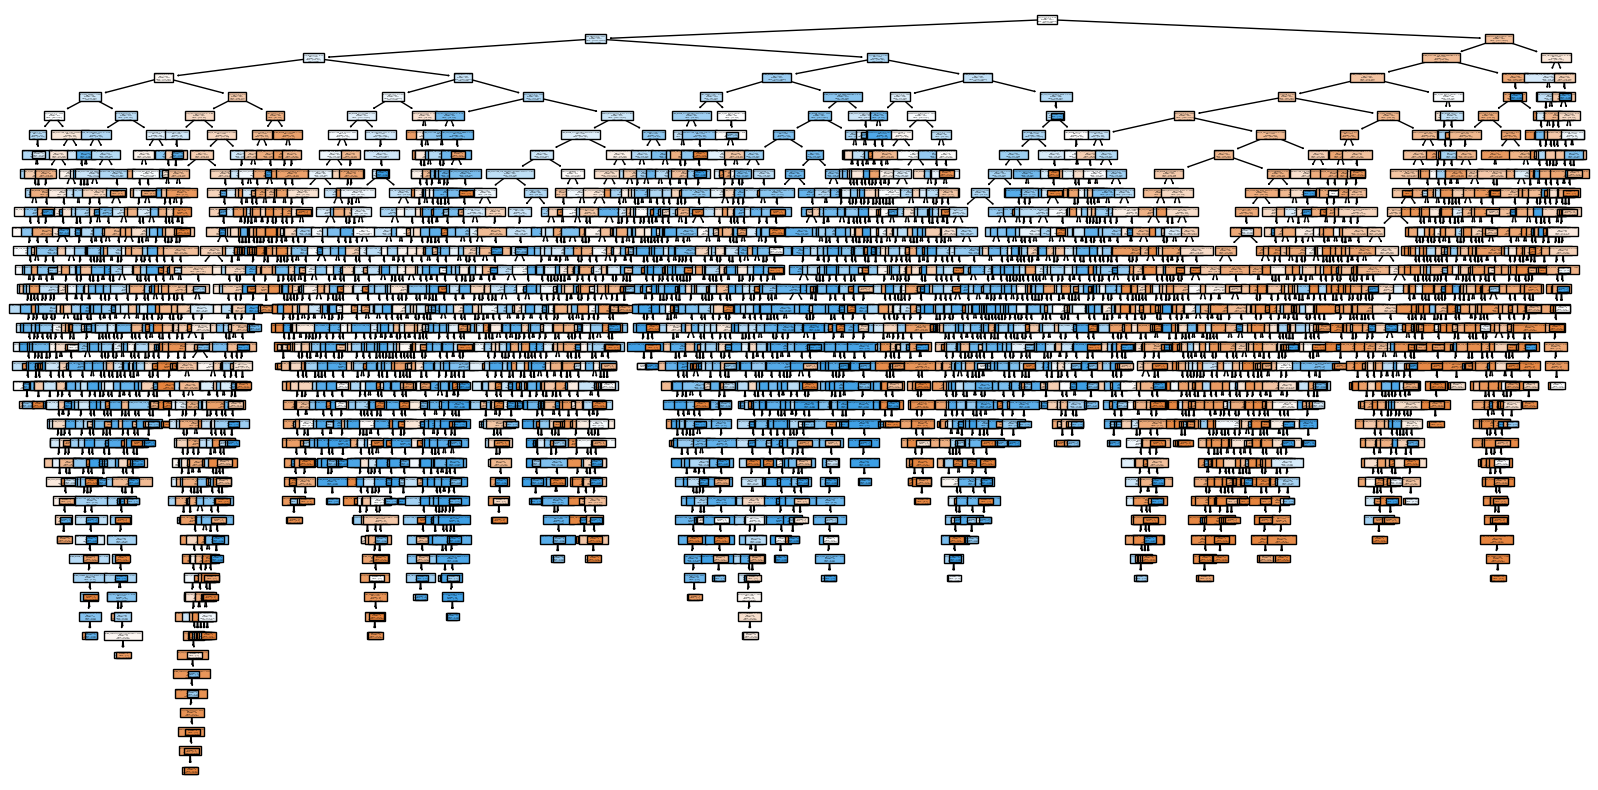

In [103]:
from sklearn.tree import plot_tree
# Get one of the decision trees from the Random Forest
decision_tree = best_rf_classifier.estimators_[0]  
max_depth = 1
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(decision_tree, filled=True, feature_names=new_train_set.columns, class_names=["Non-default", "Default"])
plt.show()

#### Xgboost Model

XGBoost, or Extreme Gradient Boosting, is an advanced computational technique that refines its forecasts through an ensemble of decision trees, progressively improving accuracy by focusing on reducing errors. This method employs gradient boosting to enhance model outcomes by iteratively minimizing a specific error metric. It also incorporates regularization strategies to prevent overfitting and is adept at managing incomplete data. Recognized for its rapid processing, precision, and overall performance, XGBoost has become a popular choice for tackling a wide array of machine learning challenges, particularly those involving structured datasets.

In [105]:
param_grid = {
    'n_estimators': [50, 100, 150, 170],
    'learning_rate': [ 0.01, 0.07],
    'max_depth': [1,2],
}
# Create an XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', eval_metric='auc', nthread=4, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='roc_auc', cv=5)

# Perform hyperparameter tuning
grid_search.fit(X_scaled, train_new)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_xgb = grid_search.best_estimator_

# Fit the best model to the training data
best_xgb.fit(X_scaled, train_new)

# Make predictions on the test set
y_pred = best_xgb.predict_proba(X_valid)[:, 1]

# Calculate the ROC-AUC score on the test set
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

ROC-AUC Score: 0.6734083182802411


a ROC-AUC score of 0.673 indicates that the model is moderately effective at ranking the predicted probabilities for the positive and negative classes.

Specifically, the score of 0.673 suggests that there is a 67.3% probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. This indicates that the model's ability to discriminate between the positive and negative classes is better than random chance, but there is still room for improvement.

In [106]:
print(best_params)

{'learning_rate': 0.07, 'max_depth': 2, 'n_estimators': 170}


The provided hyperparameters indicate a configuration for a gradient boosting model with a conservative learning rate of 0.07 to mitigate overfitting, a maximum tree depth of 2 to maintain simplicity in the model structure, and a total of 170 estimators, forming a moderately sized ensemble of trees that collectively contribute to the final prediction. These settings suggest a careful balance between model complexity and generalization capability.

In [112]:
# Applying best_parameters
xgb = XGBClassifier(objective='binary:logistic', eval_metric='auc',learning_rate = 0.07, max_depth = 2, n_estimators = 170,random_state=25,n_jobs=-1)
xgb.fit(X_scaled, train_new)

# Make predictions on the test set
y_pred = xgb.predict_proba(X_valid_scaled)[:, 1]

y_pred = pd.DataFrame({'pred': y_pred})

y_pred['pred'] = pd.to_numeric(y_pred['pred'])

# Threshold for the class.
threshold = 0.5

# Giving class label for every output.
y_pred = [1 if pred > threshold else 0 for pred in y_pred['pred']]

# Calculate accuracy
accuracy = accuracy_score(y_valid, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"RMSE: {rmse:.2f}")

# Calculate the ROC-AUC score on the valid set
roc_auc = roc_auc_score(y_valid, y_pred)
print(f'ROC-AUC Score: {roc_auc}')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_valid, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')

FN = conf_matrix[1, 0]  # False Negatives
FP = conf_matrix[0, 1]  # False Positives

print(f'False Negatives: {FN}')
print(f'False Positives: {FP}')
from sklearn.metrics import precision_score, recall_score

# Calculate sentivity
sensitivity = recall_score(y_valid, y_pred)

# Calculate precision
precision = precision_score(y_valid, y_pred)

# Calculate specificity
specificity = TN / (TN + FP)

print(f'Sensitivity (Recall): {sensitivity}')
print(f'Precision: {precision}')
print(f'Specificity: {specificity}')

Accuracy on the test set: 0.65
RMSE: 0.59
ROC-AUC Score: 0.6524998031526489
Confusion Matrix:
[[4124  829]
 [2626 2351]]
True Positives: 2351
True Negatives: 4124
False Negatives: 2626
False Positives: 829
Sensitivity (Recall): 0.4723729154108901
Precision: 0.7393081761006289
Specificity: 0.8326266908944074


Here the accuracy for XGBoost model is 0.65.

AUC for the validation set for XGBoost model is 0.652.

RMSE for the validation set for XGBoost model is 0.59.

Classification matrix for the validation set for XGBoost model is -

True Positives: 2351.
True Negatives: 4124.
False Negatives: 2626.
False Positives: 829.

Here the sensitivity is = 0.472.

Precision for the validation dataset is = 0.739.

The specificity for the validation model is 0.832.

Here the specificty and precision is around 0.739 and 0.832 respectively which is considered good for the model.

In [113]:
# Predicting the xgb model on the test data.
final_pred = xgb.predict_proba(X_test_scaled)[:, 1]

Here, we are predicting the best model on the X_test_scaled (scaled of test data). And uploading the predicted values to Kaggle to get Kaggle score.

In [114]:
final_df = pd.DataFrame()
final_df["SK_ID_CURR"] = test_id
final_df["TARGET"] = final_pred
final_df

,SK_ID_CURR,TARGET
0,100001,0.586183
1,100005,0.733518
2,100013,0.225736
3,100028,0.400433
4,100038,0.494137
...,...,...
48739,456221,0.338443
48740,456222,0.433971
48741,456223,0.583767
48742,456224,0.433949


In [115]:
final_df.to_csv("xgboost.csv", index = False)

The Kaggle score of 0.70854 is quite impressive, especially when compared to the performance of random forest and regression models.

###  Results

Here, we are tablulating the results of accuracy, ROC, RMSE, Kaggle score for different model used in this notebook modeling.

In [116]:
# Dataframe for results table
final_result ={
    'Model Name': ['Logistic Regression', 'RandomForest', 'XGBoost'],
    'Accuracy': [0.69, 0.68, 0.65],
    'RMSE': [0.56, 0.57, 0.59],
    'AUC Score': [0.685, 0.679, 0.652],
    'Kaggle Score': [0.67522, 0.66953, 0.70854]
}

final_result = pd.DataFrame(final_result)
final_result


,Model Name,Accuracy,RMSE,AUC Score,Kaggle Score
0,Logistic Regression,0.69,0.56,0.685,0.67522
1,RandomForest,0.68,0.57,0.679,0.66953
2,XGBoost,0.65,0.59,0.652,0.70854


From the dataframe above, XGBoost could be considered the best overall model for its superior performance on Kaggle with score of 0.70854, highlighting its strength in generalization across diverse data scenarios.

### Team Members Contribution

Anusha Vivekanand - Anusha's tasks includes Pre Modelling and implementing Random Forest model</br>

Kritika- Kritika's tasks includes EDA, data cleaning, null value treatment, analyze dataset and creating decision tree chart in random forest model.</br>

Charlie Vandel - Charlie was in charge of implementing the XG Boost model and conducting hyperparameter tuning.</br>

Sakshi Pandey- Sakshi's tasks includes creating majority class of target variable and building the Logistic regression model.</br>

### Conclusion

In summary, the findings from this modeling notebook are as follows:

The dataset exhibits a notable class imbalance, with a minority of defaults compared to non-defaults. Correcting this imbalance is crucial as it can impact model training and evaluation methodologies. Therefore, we employed the imblearn library and under-sampling technique to rectify the imbalance in the target variable.

We utilized one-hot encoding to transform the object variables into dummy variables, enabling modeling on categorical factors.

Initially, we implemented a logistic regression model, yielding a Kaggle score of approximately 0.67.

Subsequently, we explored data modeling using random forest, conducting hyperparameter tuning, and obtained a Kaggle score of around 0.66, indicating the necessity for further model refinement.

Consequently, we adopted the XGBoost model with hyperparameter tuning, achieving a Kaggle score of 0.71.

In conclusion, it can be inferred that XGBoost is a suitable model for the cleaned dataset, with a Kaggle score of 0.71.